## Retail Strategy and Analytics Task 2

The purpose of this activity is to find the suitable control store that would be the reference for trial stores 77, 86 and 88.
Thee perfomance of trial stores will be evaluated during the trial period with refence to the chosen control store.

### Loading Required Libraries and Datasets

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

#loading dataset
df_transactions = pd.read_csv('QVI_data.csv')
#showing dataframe
df_transactions.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


### Pre-processing Data

In [69]:
#cheking for null data and duplicates
print(df_transactions.isnull().sum())
print(' ')
print('No. of Duplicated rows: ', df_transactions.duplicated().sum())

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
 
No. of Duplicated rows:  1


In [70]:
#View, drop and check duplicates again
print(df_transactions[df_transactions.duplicated()])
df_transactions.drop_duplicates(inplace=True)
print(' ')
print('No. of Duplicated rows: ', df_transactions.duplicated().sum())

        LYLTY_CARD_NBR        DATE  STORE_NBR  TXN_ID  PROD_NBR  \
106249          107024  2018-10-01        107  108462        45   

                                     PROD_NAME  PROD_QTY  TOT_SALES  \
106249  Smiths Thinly Cut   Roast Chicken 175g         2        6.0   

        PACK_SIZE   BRAND              LIFESTAGE PREMIUM_CUSTOMER  
106249        175  SMITHS  OLDER SINGLES/COUPLES          Premium  
 
No. of Duplicated rows:  0


In [71]:
#getting basic statistics
df_transactions.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648330e+05,264833.000000,2.648330e+05,264833.000000,264833.000000,264833.000000,264833.000000
mean,1.355489e+05,135.079529,1.351577e+05,56.583598,1.905812,7.299351,182.425540
std,8.058003e+04,76.784189,7.813305e+04,32.826498,0.343437,2.527244,64.325268
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760000e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351370e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.027000e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


No outliers on the data above

In [72]:
#getting info on dataframe
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264833 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264833 non-null  int64  
 1   DATE              264833 non-null  object 
 2   STORE_NBR         264833 non-null  int64  
 3   TXN_ID            264833 non-null  int64  
 4   PROD_NBR          264833 non-null  int64  
 5   PROD_NAME         264833 non-null  object 
 6   PROD_QTY          264833 non-null  int64  
 7   TOT_SALES         264833 non-null  float64
 8   PACK_SIZE         264833 non-null  int64  
 9   BRAND             264833 non-null  object 
 10  LIFESTAGE         264833 non-null  object 
 11  PREMIUM_CUSTOMER  264833 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 26.3+ MB


In [73]:
#changeing datatype
df_transactions['DATE'] = pd.to_datetime(df_transactions['DATE'])

### Selecting Control Store

In [74]:
#creating year and month column for easy summarization
col_year = df_transactions['DATE'].dt.year
col_month = df_transactions['DATE'].dt.month
df_transactions['YEAR'] = col_year
df_transactions['MONTH'] = col_month

In [75]:
#creating month summary dataframe(total sales, number of transactions etc.)
df_summary = df_transactions.groupby(['YEAR', 'MONTH', 'STORE_NBR'], as_index=True).aggregate(T_SALES=('TOT_SALES', 'sum'),
                                                                 N_CUSTOMERS=('LYLTY_CARD_NBR', 'nunique'),
                                                                 N_TRANSACTIONS=('TXN_ID', 'nunique'),
                                                                 T_PRODUCT=('PROD_QTY', 'sum')).reset_index()
df_summary.head(3)

,YEAR,MONTH,STORE_NBR,T_SALES,N_CUSTOMERS,N_TRANSACTIONS,T_PRODUCT
0,2018,7,1,206.9,49,52,62
1,2018,7,2,150.8,39,41,46
2,2018,7,3,1205.7,112,138,271


In [76]:
#final sumarization
N_TRANSACTIONS_PER_CUST = df_summary.loc[:,'N_TRANSACTIONS'] / df_summary.loc[:,'N_CUSTOMERS']
N_CHIPS_PER_TRANS = df_summary.loc[:,'T_PRODUCT'] / df_summary.loc[:,'N_TRANSACTIONS']
A_PRICE_PER_UNIT = df_summary.loc[:,'T_SALES'] / df_summary.loc[:,'T_PRODUCT']

#creating new summary
df_summary_final = df_summary.loc[:,'YEAR':'N_CUSTOMERS']
df_summary_final = pd.concat([df_summary_final, N_TRANSACTIONS_PER_CUST, N_CHIPS_PER_TRANS, A_PRICE_PER_UNIT], axis=1)
df_summary_final.columns = ['YEAR', 'MONTH', 'STORE_NBR', 'T_SALES', 'N_CUSTOMERS', 'N_TRANSACTIONS_PER_CUST', 'N_CHIPS_PER_TRANS', 'A_PRICE_PER_UNIT']

In [77]:
#adding 'MONTH_YEAR' columns for later visualization
df_summary_final.loc[:,'MONTH_YEAR'] = df_summary_final.loc[:,'MONTH'].astype(str) + '/' + df_summary_final.loc[:,'YEAR'].astype(str)

df_summary_final.head()

,YEAR,MONTH,STORE_NBR,T_SALES,N_CUSTOMERS,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT,MONTH_YEAR
0,2018,7,1,206.9,49,1.061224,1.192308,3.337097,7/2018
1,2018,7,2,150.8,39,1.051282,1.121951,3.278261,7/2018
2,2018,7,3,1205.7,112,1.232143,1.963768,4.449077,7/2018
3,2018,7,4,1399.9,128,1.234375,2.012658,4.402201,7/2018
4,2018,7,5,812.0,93,1.290323,2.000000,3.383333,7/2018


In [78]:
df_summary_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YEAR                     3169 non-null   int32  
 1   MONTH                    3169 non-null   int32  
 2   STORE_NBR                3169 non-null   int64  
 3   T_SALES                  3169 non-null   float64
 4   N_CUSTOMERS              3169 non-null   int64  
 5   N_TRANSACTIONS_PER_CUST  3169 non-null   float64
 6   N_CHIPS_PER_TRANS        3169 non-null   float64
 7   A_PRICE_PER_UNIT         3169 non-null   float64
 8   MONTH_YEAR               3169 non-null   object 
dtypes: float64(4), int32(2), int64(2), object(1)
memory usage: 198.2+ KB


In [79]:
#seperating stores with full observations(12 months)

#listing stores with full observations
store_full_obs = df_summary_final.groupby('STORE_NBR')['MONTH'].count().reset_index()
store_full_obs = store_full_obs.loc[store_full_obs['MONTH'] == 12]

df_stores_fullOb = df_summary_final[df_summary_final['STORE_NBR'].isin(store_full_obs['STORE_NBR'])]


In [80]:
#creating pre-trial table
df_fullOb_2018 = df_stores_fullOb.loc[df_stores_fullOb['YEAR'] == 2018]
df_fullOb_2019_jan = df_stores_fullOb.loc[(df_stores_fullOb['YEAR'] == 2019) & (df_stores_fullOb['MONTH'] < 2)]
df_pre_trial = pd.concat([df_fullOb_2018, df_fullOb_2019_jan], axis=0)
df_pre_trial.head(3)

,YEAR,MONTH,STORE_NBR,T_SALES,N_CUSTOMERS,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT,MONTH_YEAR
0,2018,7,1,206.9,49,1.061224,1.192308,3.337097,7/2018
1,2018,7,2,150.8,39,1.051282,1.121951,3.278261,7/2018
2,2018,7,3,1205.7,112,1.232143,1.963768,4.449077,7/2018


Above codes has created the pre-trial data frame that is to be used to select control stores.


#### Creating functions

In [81]:
#separating trial and control data
trial_stores_list = [77, 86, 88]
df_trial = df_pre_trial[df_pre_trial['STORE_NBR'].isin(trial_stores_list)]
df_control = df_pre_trial[~df_pre_trial['STORE_NBR'].isin(trial_stores_list)]
control_stores_list = pd.unique(df_control['STORE_NBR'])

In [82]:
#creating function for correlation calculation
def corr_function(trial_stores, control_stores):
    corr_table = []
    trial_store_list = []
    control_store_list = []
    for i in trial_stores:
        for j in control_stores:
            #corrwith methon would return NaN if indices were not reset
            trial_select = df_trial[df_trial['STORE_NBR'] == i].reset_index()
            control_select = df_control[df_control['STORE_NBR'] == j].reset_index()

            #using pearson correlation(default parameter)
            row = trial_select.loc[:,'T_SALES':'A_PRICE_PER_UNIT'].corrwith(control_select.loc[:,'T_SALES':'A_PRICE_PER_UNIT'])
            corr_table.append(row)
            trial_store_list.append(i)
            control_store_list.append(j)

    corr_table = pd.DataFrame(corr_table)
    corr_table['TRIAL_STORE'] = trial_store_list
    corr_table['CONTROL_STORE'] = control_store_list
    corr_table = corr_table[['TRIAL_STORE', 'CONTROL_STORE', 'T_SALES', 'N_CUSTOMERS', 'N_TRANSACTIONS_PER_CUST', 'N_CHIPS_PER_TRANS', 'A_PRICE_PER_UNIT']] 
       
    return corr_table

In [83]:
#creating absolute distance calculation function
def absolute_distance(trial_stores, control_stores):
    abs_dist_table = []
    trial_store_list = []
    control_store_list = []
    for i in trial_stores:
        for j in control_stores:
           #would return NaN if indices were not reset
            trial_select = df_trial[df_trial['STORE_NBR'] == i].reset_index()
            control_select = df_control[df_control['STORE_NBR'] == j].reset_index()

            #using pearson correlation(default parameter)
            row = (trial_select.loc[:,'T_SALES':'A_PRICE_PER_UNIT'] - control_select.loc[:,'T_SALES':'A_PRICE_PER_UNIT']).abs()
            row = row.mean()
            abs_dist_table.append(row)
            trial_store_list.append(i)
            control_store_list.append(j)

    abs_dist_table = pd.DataFrame(abs_dist_table)
    abs_dist_table['TRIAL_STORE'] = trial_store_list
    abs_dist_table['CONTROL_STORE'] = control_store_list
    abs_dist_table = abs_dist_table[['TRIAL_STORE', 'CONTROL_STORE', 'T_SALES', 'N_CUSTOMERS', 'N_TRANSACTIONS_PER_CUST', 'N_CHIPS_PER_TRANS', 'A_PRICE_PER_UNIT']] 
        
    return abs_dist_table

In [84]:
#creating absolute distance scale calculator function
def absolute_scale(abs_data):
    num_of_rows = len(abs_data)
    columns_list = abs_data.loc[:,'T_SALES':].columns
    trial_store_list = []
    control_store_list = []
    score = pd.DataFrame()    

    for i in columns_list:
        metric = []
        trial_store = []
        control_store = []
        for j in range(0, num_of_rows):
            min_val = abs_data[i].min()
            max_val = abs_data[i].max()
            val = abs_data.loc[j, i]

            calculated_metric = 1 - ((val-min_val)/(max_val-min_val))
            metric.append(calculated_metric)
            trial_store.append(abs_data.loc[j, 'TRIAL_STORE'])
            control_store.append(abs_data.loc[j, 'CONTROL_STORE'])

        score['TRIAL_STORE'] = pd.DataFrame(trial_store)
        score['CONTROL_STORE'] = pd.DataFrame(control_store)
        score[i] = pd.DataFrame(metric)
    return score

In [85]:
def score_metric(correlations, abs_scale):
    #getting store columns
    store_cols = correlations.loc[:, 'TRIAL_STORE': 'CONTROL_STORE']

    
    corr_cols = correlations.loc[:,'T_SALES':'A_PRICE_PER_UNIT']
    abs_scale_cols = abs_scale.loc[:,'T_SALES':'A_PRICE_PER_UNIT']


    average_score = (corr_cols + abs_scale_cols)/2
    average_score = pd.concat([store_cols, average_score], axis=1)

    return average_score

In [86]:
#final best score
def find_best_score(final_scores_df, trial_store):
    #fetch columns
    store_cols = final_scores_df.loc[:,'TRIAL_STORE':'CONTROL_STORE']
    t_sales_scores = final_scores_df.loc[:,'T_SALES']
    n_customers_scores = final_scores_df.loc[:,'N_CUSTOMERS']

    #calculate average
    score_control = (t_sales_scores * 0.5) + (n_customers_scores * 0.5)

    
    summary = pd.concat([store_cols, t_sales_scores, n_customers_scores, score_control], axis=1)
    summary.rename(columns={0: 'FINAL_SCORE'}, inplace=True)
    best_score = summary.loc[summary['TRIAL_STORE'] == trial_store].nlargest(1, 'FINAL_SCORE')
    
    return best_score

### Creation of tables for data evaluation

In [87]:
#geting correlation
df_correlation = corr_function(trial_stores_list, control_stores_list)
df_correlation.head()

,TRIAL_STORE,CONTROL_STORE,T_SALES,N_CUSTOMERS,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT
0,77,1,0.075218,0.322168,-0.088077,-0.827332,-0.842303
1,77,2,-0.263079,-0.572051,-0.459539,0.246517,0.250020
2,77,3,0.806644,0.834207,0.372518,-0.033031,-0.002904
3,77,4,-0.263300,-0.295639,0.024659,-0.144294,-0.407973
4,77,5,-0.110652,0.370659,0.588448,0.060559,0.267377


In [88]:
#getting absolute distance
df_absolute = absolute_distance(trial_stores_list, control_stores_list)
df_absolute.head()

,TRIAL_STORE,CONTROL_STORE,T_SALES,N_CUSTOMERS,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT
0,77,1,59.900000,5.714286,0.034283,0.311254,0.398162
1,77,2,81.500000,7.285714,0.039857,0.413150,0.229990
2,77,3,832.450000,63.571429,0.114934,0.426491,0.882516
3,77,4,1061.142857,78.571429,0.161423,0.472052,0.878028
4,77,5,577.242857,50.285714,0.198088,0.457317,0.222050


In [89]:
#getting absolute scale
df_abs_scale = absolute_scale(df_absolute)
df_abs_scale.head()

,TRIAL_STORE,CONTROL_STORE,T_SALES,N_CUSTOMERS,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT
0,77,1,0.968556,0.958775,0.940920,0.684771,0.747190
1,77,2,0.952020,0.945819,0.917850,0.579332,0.870462
2,77,3,0.377101,0.481743,0.607104,0.565527,0.392151
3,77,4,0.202017,0.358068,0.414684,0.518383,0.395441
4,77,5,0.572485,0.591284,0.262929,0.533630,0.876283


In [90]:
df_final_metric = score_metric(df_correlation, df_abs_scale)
df_final_metric.head()

,TRIAL_STORE,CONTROL_STORE,T_SALES,N_CUSTOMERS,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT
0,77,1,0.521887,0.640472,0.426421,-0.071280,-0.047557
1,77,2,0.344470,0.186884,0.229155,0.412924,0.560241
2,77,3,0.591872,0.657975,0.489811,0.266248,0.194624
3,77,4,-0.030641,0.031215,0.219672,0.187044,-0.006266
4,77,5,0.230916,0.480971,0.425688,0.297095,0.571830


#### Trial Store 77

In [91]:
#finding the matching control store for trial store 77
find_best_score(df_final_metric, 77)

,TRIAL_STORE,CONTROL_STORE,T_SALES,N_CUSTOMERS,FINAL_SCORE
218,77,233,0.951887,0.995179,0.973533


In terms of Total chip sales and number of customers, the control store 233 matches with trial store 77

##### Visual checking of data

In [92]:
#creating a function to process data for visual comparison
#between trial store and selected control store
#This is because 'year' and 'month' are separated and needs to be combined
def data_for_plot(df, trial, control):
    df_plot = df.loc[(df['STORE_NBR'] == trial) | (df['STORE_NBR'] == control)]
    df_plot.loc[:,'MONTHYEAR'] = df_plot.loc[:,'MONTH'].astype(str) + '/' + df_plot.loc[:,'YEAR'].astype(str)
    df_plot = df_plot.drop(['YEAR', 'MONTH'], axis=1)
    df_plot = df_plot[['STORE_NBR', 'MONTHYEAR', 'T_SALES', 'N_CUSTOMERS', 'N_TRANSACTIONS_PER_CUST', 'N_CHIPS_PER_TRANS', 'A_PRICE_PER_UNIT']]
    #corr_table[['TRIAL_STORE', 'CONTROL_STORE', 'T_SALES', 'N_CUSTOMERS', 'N_TRANSACTIONS_PER_CUST', 'N_CHIPS_PER_TRANS', 'A_PRICE_PER_UNIT']]
    return df_plot

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5388\2945127960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.loc[:,'MONTHYEAR'] = df_plot.loc[:,'MONTH'].astype(str) + '/' + df_plot.loc[:,'YEAR'].astype(str)


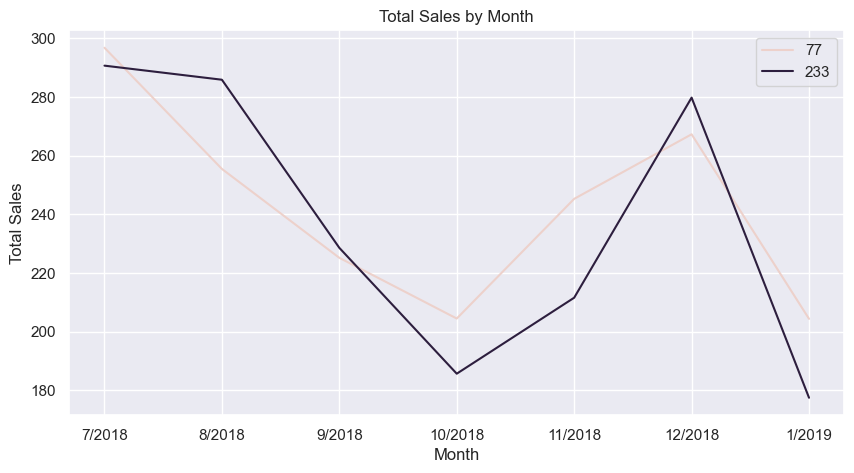

In [130]:
#plotting Total Sales comparison
#creating comparison data frame
comparison_data = data_for_plot(df_pre_trial, 77, 233)

plt.figure(figsize=(10,5))
sns.lineplot(data=comparison_data, x='MONTHYEAR', y='T_SALES', hue='STORE_NBR')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.title('Total Sales by Month')
plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5388\2945127960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.loc[:,'MONTHYEAR'] = df_plot.loc[:,'MONTH'].astype(str) + '/' + df_plot.loc[:,'YEAR'].astype(str)


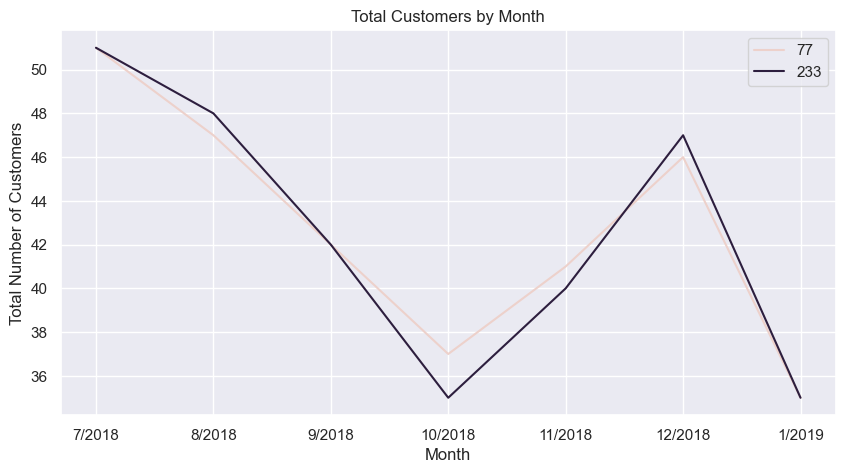

In [142]:
#plotting number of customers comparison
#creating comparison data frame
comparison_data = data_for_plot(df_pre_trial, 77, 233)

plt.figure(figsize=(10,5))
sns.lineplot(data=comparison_data, x='MONTHYEAR', y='N_CUSTOMERS', hue='STORE_NBR')
plt.ylabel('Total Number of Customers')
plt.xlabel('Month')
plt.title('Total Customers by Month')
plt.legend()
plt.show()

##### Assesstment of Trial

The trial period starts February 2019 onwards. Uplifts in overall chip sales will be investigated.


In [95]:
# Scaling pre-trial control sales to match pre-trial trial stores sales

#getting scale factor from total sales between trial and control stores
t_sales_scale_factor = df_pre_trial.loc[df_pre_trial['STORE_NBR'] == 77, 'T_SALES'].sum() / df_pre_trial.loc[df_pre_trial['STORE_NBR'] == 233, 'T_SALES'].sum()
n_cust_scale_factor = df_pre_trial.loc[df_pre_trial['STORE_NBR'] == 77, 'N_CUSTOMERS'].sum() / df_pre_trial.loc[df_pre_trial['STORE_NBR'] == 233, 'N_CUSTOMERS'].sum()
print('Total sales scale factor: ', t_sales_scale_factor)
print('Number of Customers scale factor: ', n_cust_scale_factor)

Total sales scale factor:  1.023617303289553
Number of Customers scale factor:  1.0033557046979866


In [96]:
#applying scale factor to all control stores' total sales data
scaled_control_233 = df_summary_final.loc[df_summary_final['STORE_NBR'] == 233]
scaled_control_233.loc[:,'T_SALES'] = scaled_control_233.loc[:,'T_SALES'].map(lambda x: x * t_sales_scale_factor)
scaled_control_233.loc[:,'N_CUSTOMERS'] = scaled_control_233.loc[:,'N_CUSTOMERS'].map(lambda x: x * n_cust_scale_factor)
scaled_control_233 = scaled_control_233.reset_index().drop('index', axis=1)
scaled_control_233.head()

,YEAR,MONTH,STORE_NBR,T_SALES,N_CUSTOMERS,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT,MONTH_YEAR
0,2018,7,233,297.565550,51.171141,1.058824,1.629630,3.303409,7/2018
1,2018,8,233,292.652187,48.161074,1.041667,1.600000,3.573750,8/2018
2,2018,9,233,233.998916,42.140940,1.071429,1.555556,3.265714,9/2018
3,2018,10,233,190.085733,35.117450,1.028571,1.555556,3.316071,10/2018
4,2018,11,233,216.597421,40.134228,1.025000,1.512195,3.412903,11/2018


In [97]:
#getting percent diff between trial and control store
store_77 = df_summary_final.loc[df_summary_final['STORE_NBR'] == 77, 'YEAR':'N_CUSTOMERS']
store_77.head()

,YEAR,MONTH,STORE_NBR,T_SALES,N_CUSTOMERS
73,2018,7,77,296.8,51
338,2018,8,77,255.5,47
603,2018,9,77,225.2,42
868,2018,10,77,204.5,37
1132,2018,11,77,245.3,41


In [98]:
#merging trial store 77 and control store 233
scaled_control_233 = scaled_control_233.merge(store_77, on=['YEAR', 'MONTH'])
scaled_control_233.head()

,YEAR,MONTH,STORE_NBR_x,T_SALES_x,N_CUSTOMERS_x,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT,MONTH_YEAR,STORE_NBR_y,T_SALES_y,N_CUSTOMERS_y
0,2018,7,233,297.565550,51.171141,1.058824,1.629630,3.303409,7/2018,77,296.8,51
1,2018,8,233,292.652187,48.161074,1.041667,1.600000,3.573750,8/2018,77,255.5,47
2,2018,9,233,233.998916,42.140940,1.071429,1.555556,3.265714,9/2018,77,225.2,42
3,2018,10,233,190.085733,35.117450,1.028571,1.555556,3.316071,10/2018,77,204.5,37
4,2018,11,233,216.597421,40.134228,1.025000,1.512195,3.412903,11/2018,77,245.3,41


In [99]:
#calculating for percent difference
scaled_control_233.loc[:, 'PERCENT_DIFF'] = (scaled_control_233.loc[:,'T_SALES_x'] - scaled_control_233.loc[:,'T_SALES_y']).abs() / scaled_control_233.loc[:,'T_SALES_x']
scaled_control_233.loc[:, 'CUST_DIFF'] = (scaled_control_233.loc[:,'N_CUSTOMERS_x'] - scaled_control_233.loc[:,'N_CUSTOMERS_y']).abs() / scaled_control_233.loc[:,'N_CUSTOMERS_x']
scaled_control_233.head()

,YEAR,MONTH,STORE_NBR_x,T_SALES_x,N_CUSTOMERS_x,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT,MONTH_YEAR,STORE_NBR_y,T_SALES_y,N_CUSTOMERS_y,PERCENT_DIFF,CUST_DIFF
0,2018,7,233,297.565550,51.171141,1.058824,1.629630,3.303409,7/2018,77,296.8,51,0.002573,0.003344
1,2018,8,233,292.652187,48.161074,1.041667,1.600000,3.573750,8/2018,77,255.5,47,0.126950,0.024108
2,2018,9,233,233.998916,42.140940,1.071429,1.555556,3.265714,9/2018,77,225.2,42,0.037602,0.003344
3,2018,10,233,190.085733,35.117450,1.028571,1.555556,3.316071,10/2018,77,204.5,37,0.075830,0.053607
4,2018,11,233,216.597421,40.134228,1.025000,1.512195,3.412903,11/2018,77,245.3,41,0.132516,0.021572


In [100]:
#computing standard deviation
stddev_preTrial = scaled_control_233.iloc[0:7, 12].std()
stddev_n_cust = scaled_control_233.iloc[0:7, 13].std()
print("Standard dev of sales diff: ", stddev_preTrial)
print("Standard dev of n cust diff: ", stddev_n_cust)

Standard dev of sales diff:  0.04994076264142537
Standard dev of n cust diff:  0.01824074855824395


In [101]:
#testing a null hypothesis
percent_diff = scaled_control_233.iloc[7:, 12].map(lambda x: (x - 0)/stddev_preTrial)
n_cust_diff = scaled_control_233.iloc[7:, 13].map(lambda x: (x - 0)/stddev_n_cust)
pd.concat([scaled_control_233.iloc[7:, 0:2], percent_diff, n_cust_diff], 
          axis=1)

,YEAR,MONTH,PERCENT_DIFF,CUST_DIFF
7,2019,2,1.183534,0.183352
8,2019,3,7.339116,13.476388
9,2019,4,12.476373,30.778725
10,2019,5,3.023650,2.100509
11,2019,6,3.406093,0.183352


In [102]:
#finding the 95th percentile of the t distribution
import scipy.stats as stats

stats.t.ppf(0.95, 7)

1.894578605061305

With the value of the 95th percentile of 1.84579, a value higher would mean greater sales or number of customers. 
During the trial period, store 77 has greater sales and number of customers than control store.
To show this visually, total sales and number of customers will be charted.

In [103]:
#creating function to compare statistical results between trial stores and control stores
def plot_comparison(summary_final, trial_store, control_store):
    plot_visual = summary_final.loc[summary_final['STORE_NBR'].isin([trial_store, control_store])]
    plot_visual.loc[:,'STORE_NBR'] = plot_visual.loc[:,'STORE_NBR'].astype(str) #convert store numbers to string type in order to be easily plotted in seaborn lineplot(hue)
    plot_visual = plot_visual.drop(['YEAR', 'MONTH', 'N_TRANSACTIONS_PER_CUST', 'N_CHIPS_PER_TRANS', 'A_PRICE_PER_UNIT'], axis=1) #drop cols
    plot_visual = plot_visual.reset_index().drop('index', axis=1) #reset indices and drop the newly formed 'index' column

    ##### Selecting control store and setting up variables
    selected_control = plot_visual.loc[plot_visual['STORE_NBR'] == str(control_store)].reset_index().drop('index', axis=1)
    q_items = ['5th % Confidence Interval', '95th % Confidence Interval']
    fifth = []
    ninetyfifth = []
    output_data = pd.DataFrame()

    #loop to calculate 5th interval
    for i in range(12):
        confidence_sales = selected_control.loc[i,'T_SALES'] * (1 - stddev_preTrial * 2)
        confidence_ncust = selected_control.loc[i, 'N_CUSTOMERS'] * (1 - stddev_n_cust * 2)
        month_yr = selected_control.loc[i, 'MONTH_YEAR']
        row = [q_items[0], confidence_sales, confidence_ncust, month_yr]
        fifth.append(row)
        row = []

    #loop to calculate 95th interval
    for j in range(12):
        confidence_sales = selected_control.loc[j,'T_SALES'] * (1 + stddev_preTrial * 2)
        confidence_ncust = selected_control.loc[j, 'N_CUSTOMERS'] * (1 + stddev_n_cust * 2)
        month_yr = selected_control.loc[j, 'MONTH_YEAR']
        row = [q_items[1], confidence_sales, confidence_ncust, month_yr]
        ninetyfifth.append(row)
        row = []
    output_data = pd.concat([pd.DataFrame(fifth), pd.DataFrame(ninetyfifth)], axis=0, ignore_index=True)
    output_data.columns = plot_visual.columns
    
    return pd.concat([plot_visual, output_data], axis=0)

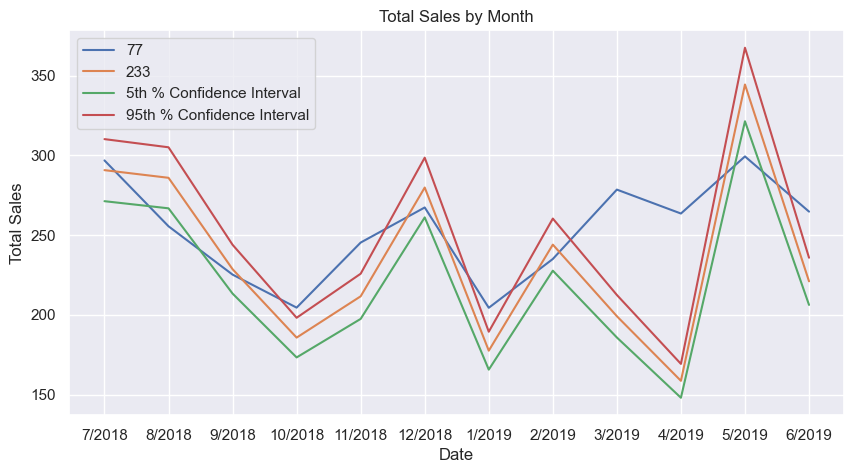

In [132]:
#plotting total sales comparison
store_77_233 = plot_comparison(df_summary_final, 77, 233)
plt.figure(figsize=(10,5))
sns.lineplot(data=store_77_233, x='MONTH_YEAR', y='T_SALES', hue='STORE_NBR')
plt.title('Total Sales by Month')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

As shown above, there is an increse in sales for trial store 77 during the trial months.

Looking into Number of customers

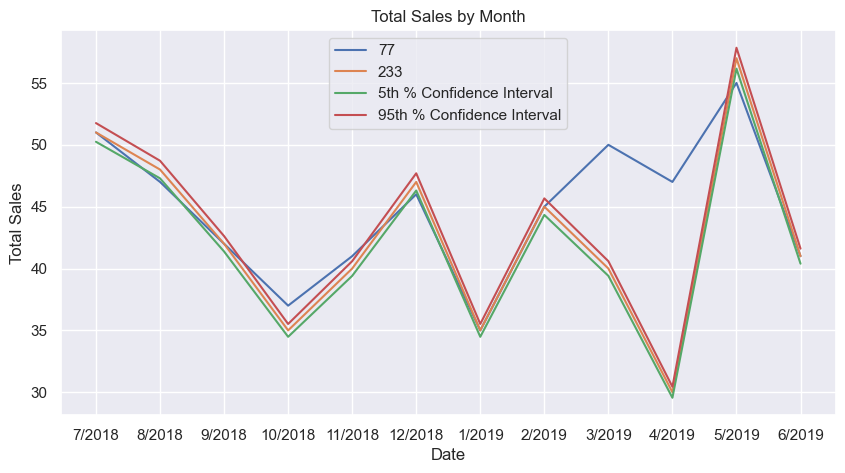

In [133]:
#plotting number of customers comparison
store_77_233 = plot_comparison(df_summary_final, 77, 233)
plt.figure(figsize=(10,5))
sns.lineplot(data=store_77_233, x='MONTH_YEAR', y='N_CUSTOMERS', hue='STORE_NBR')
plt.title('Total Sales by Month')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

Likewise, there is an increase in number of customer for store 77 during the trial period

#### Trial Store 86

In [106]:
#find matching control store for trial store 86
find_best_score(df_final_metric, 86)

,TRIAL_STORE,CONTROL_STORE,T_SALES,N_CUSTOMERS,FINAL_SCORE
401,86,155,0.933721,0.968493,0.951107


In terms of Total chip sales and number of customers, the control store 155 matches with trial store 86

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5388\2945127960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.loc[:,'MONTHYEAR'] = df_plot.loc[:,'MONTH'].astype(str) + '/' + df_plot.loc[:,'YEAR'].astype(str)


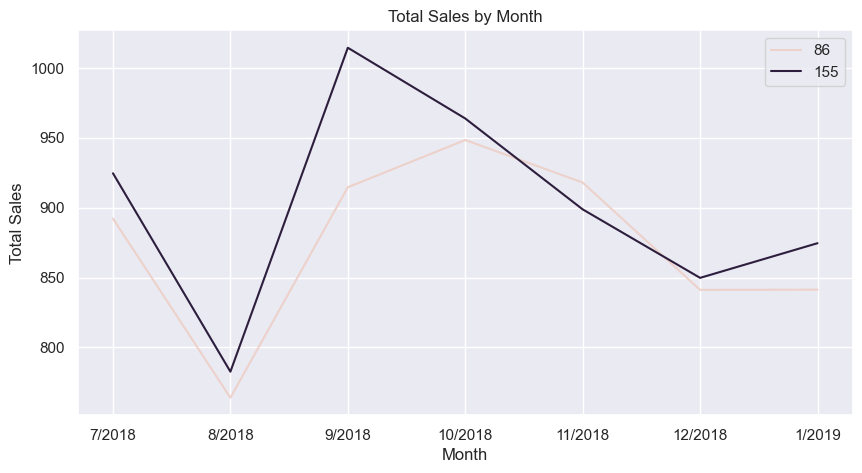

In [134]:
#plotting Total Sales comparison
#creating comparison data frame
comparison_data = data_for_plot(df_pre_trial, 86, 155)

plt.figure(figsize=(10,5))
sns.lineplot(data=comparison_data, x='MONTHYEAR', y='T_SALES', hue='STORE_NBR')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.title('Total Sales by Month')
plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5388\2945127960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.loc[:,'MONTHYEAR'] = df_plot.loc[:,'MONTH'].astype(str) + '/' + df_plot.loc[:,'YEAR'].astype(str)


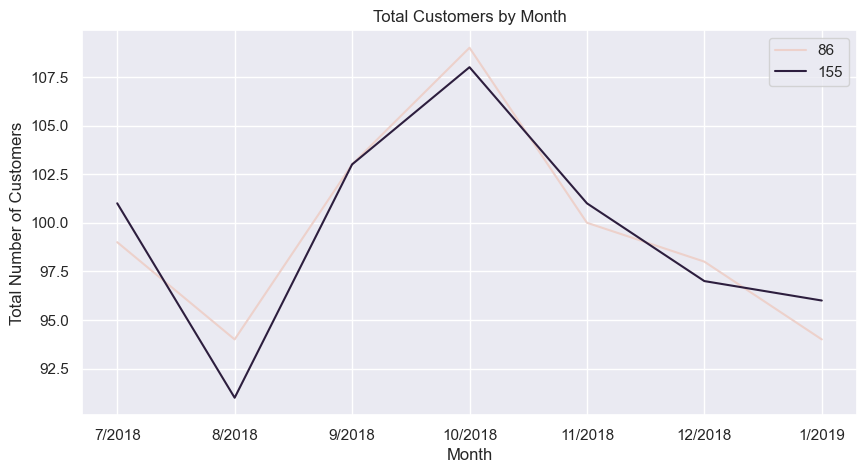

In [143]:
#plotting number of customers comparison
#creating comparison data frame
comparison_data = data_for_plot(df_pre_trial, 86, 155)

plt.figure(figsize=(10,5))
sns.lineplot(data=comparison_data, x='MONTHYEAR', y='N_CUSTOMERS', hue='STORE_NBR')
plt.ylabel('Total Number of Customers')
plt.xlabel('Month')
plt.title('Total Customers by Month')
plt.legend()
plt.show()

##### Assesstment of Trial

In [109]:
# Scaling pre-trial control sales to match pre-trial trial stores sales

#getting scale factor from total sales between trial and control stores
t_sales_scale_factor = df_pre_trial.loc[df_pre_trial['STORE_NBR'] == 86, 'T_SALES'].sum() / df_pre_trial.loc[df_pre_trial['STORE_NBR'] == 155, 'T_SALES'].sum()
n_cust_scale_factor = df_pre_trial.loc[df_pre_trial['STORE_NBR'] == 86, 'N_CUSTOMERS'].sum() / df_pre_trial.loc[df_pre_trial['STORE_NBR'] == 155, 'N_CUSTOMERS'].sum()
print('Total sales scale factor: ', t_sales_scale_factor)
print('Number of Customers scale factor: ', n_cust_scale_factor)

Total sales scale factor:  0.9700651481287743
Number of Customers scale factor:  1.0


In [110]:
#applying scale factor to all control stores' total sales data
scaled_control_155 = df_summary_final.loc[df_summary_final['STORE_NBR'] == 155]
scaled_control_155.loc[:,'T_SALES'] = scaled_control_155.loc[:,'T_SALES'].map(lambda x: x * t_sales_scale_factor)
scaled_control_155.loc[:,'N_CUSTOMERS'] = scaled_control_155.loc[:,'N_CUSTOMERS'].map(lambda x: x * n_cust_scale_factor)
scaled_control_155 = scaled_control_155.reset_index().drop('index', axis=1)
scaled_control_155.head()

,YEAR,MONTH,STORE_NBR,T_SALES,N_CUSTOMERS,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT,MONTH_YEAR
0,2018,7,155,896.922236,101,1.217822,2.032520,3.698400,7/2018
1,2018,8,155,759.269991,91,1.307692,1.924370,3.417904,8/2018
2,2018,9,155,984.034086,103,1.398058,2.013889,3.497931,9/2018
3,2018,10,155,934.948790,108,1.259259,2.000000,3.543382,10/2018
4,2018,11,155,871.894555,101,1.316832,2.030075,3.328889,11/2018


In [111]:
#getting percent diff between trial and control store
store_86 = df_summary_final.loc[df_summary_final['STORE_NBR'] == 86, 'YEAR':'N_CUSTOMERS']
store_86.head()

,YEAR,MONTH,STORE_NBR,T_SALES,N_CUSTOMERS
82,2018,7,86,892.20,99
346,2018,8,86,764.05,94
611,2018,9,86,914.60,103
876,2018,10,86,948.40,109
1140,2018,11,86,918.00,100


In [112]:
#merging trial store 86 and control store 155
scaled_control_155 = scaled_control_155.merge(store_86, on=['YEAR', 'MONTH'])
scaled_control_155.head()

,YEAR,MONTH,STORE_NBR_x,T_SALES_x,N_CUSTOMERS_x,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT,MONTH_YEAR,STORE_NBR_y,T_SALES_y,N_CUSTOMERS_y
0,2018,7,155,896.922236,101,1.217822,2.032520,3.698400,7/2018,86,892.20,99
1,2018,8,155,759.269991,91,1.307692,1.924370,3.417904,8/2018,86,764.05,94
2,2018,9,155,984.034086,103,1.398058,2.013889,3.497931,9/2018,86,914.60,103
3,2018,10,155,934.948790,108,1.259259,2.000000,3.543382,10/2018,86,948.40,109
4,2018,11,155,871.894555,101,1.316832,2.030075,3.328889,11/2018,86,918.00,100


In [113]:
#calculating for percent difference
scaled_control_155.loc[:, 'PERCENT_DIFF'] = (scaled_control_155.loc[:,'T_SALES_x'] - scaled_control_155.loc[:,'T_SALES_y']).abs() / scaled_control_155.loc[:,'T_SALES_x']
scaled_control_155.loc[:, 'CUST_DIFF'] = (scaled_control_155.loc[:,'N_CUSTOMERS_x'] - scaled_control_155.loc[:,'N_CUSTOMERS_y']).abs() / scaled_control_155.loc[:,'N_CUSTOMERS_x']
scaled_control_155.head()

,YEAR,MONTH,STORE_NBR_x,T_SALES_x,N_CUSTOMERS_x,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT,MONTH_YEAR,STORE_NBR_y,T_SALES_y,N_CUSTOMERS_y,PERCENT_DIFF,CUST_DIFF
0,2018,7,155,896.922236,101,1.217822,2.032520,3.698400,7/2018,86,892.20,99,0.005265,0.019802
1,2018,8,155,759.269991,91,1.307692,1.924370,3.417904,8/2018,86,764.05,94,0.006296,0.032967
2,2018,9,155,984.034086,103,1.398058,2.013889,3.497931,9/2018,86,914.60,103,0.070561,0.000000
3,2018,10,155,934.948790,108,1.259259,2.000000,3.543382,10/2018,86,948.40,109,0.014387,0.009259
4,2018,11,155,871.894555,101,1.316832,2.030075,3.328889,11/2018,86,918.00,100,0.052880,0.009901


In [114]:
#computing standard deviation
stddev_preTrial = scaled_control_155.iloc[0:7, 12].std()
stddev_n_cust = scaled_control_155.iloc[0:7, 13].std()
print("Standard dev of sales diff: ", stddev_preTrial)
print("Standard dev of n cust diff: ", stddev_n_cust)

Standard dev of sales diff:  0.025833952854772368
Standard dev of n cust diff:  0.010687444701395238


In [115]:
#testing a null hypothesis
percent_diff = scaled_control_155.iloc[7:, 12].map(lambda x: (x - 0)/stddev_preTrial)
n_cust_diff = scaled_control_155.iloc[7:, 13].map(lambda x: (x - 0)/stddev_n_cust)
pd.concat([scaled_control_155.iloc[7:, 0:2], percent_diff, n_cust_diff], 
          axis=1)

,YEAR,MONTH,PERCENT_DIFF,CUST_DIFF
7,2019,2,2.179542,11.819082
8,2019,3,12.226922,20.903430
9,2019,4,1.364580,5.670772
10,2019,5,0.256176,1.765429
11,2019,6,0.300725,2.954771


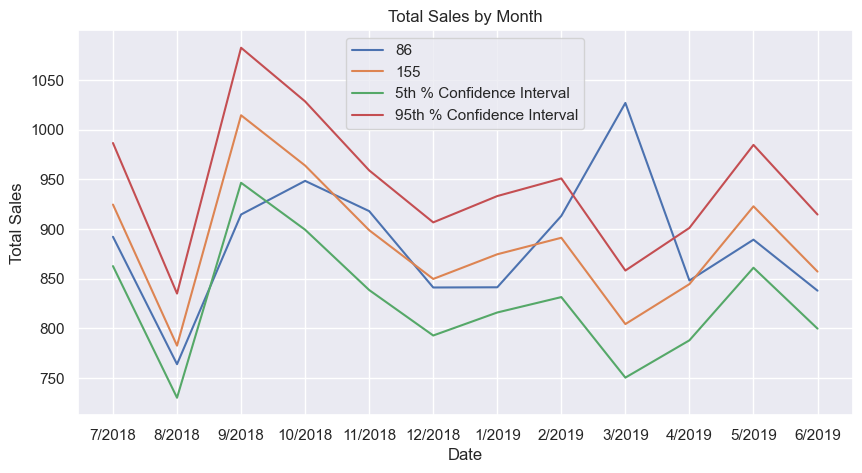

In [136]:
#plotting total sales comparison
store_86_155 = plot_comparison(df_summary_final, 86, 155)
plt.figure(figsize=(10,5))
sns.lineplot(data=store_86_155, x='MONTH_YEAR', y='T_SALES', hue='STORE_NBR')
plt.title('Total Sales by Month')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

There is a significant increase in sales for store 86 during trial period.

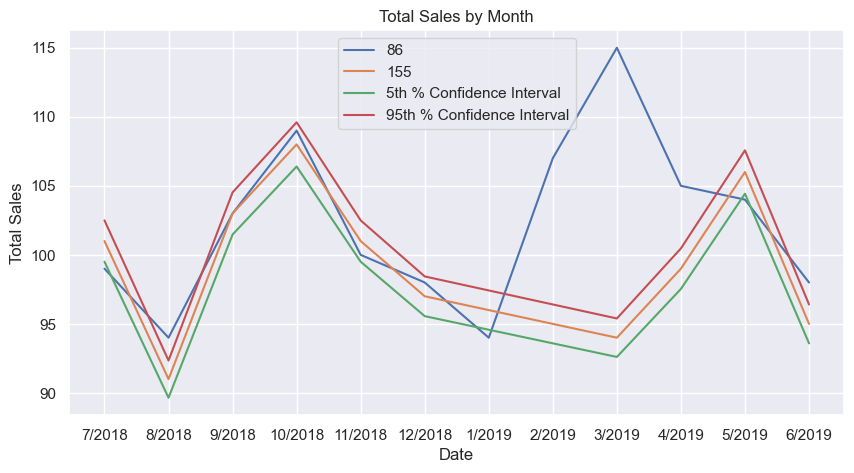

In [137]:
#plotting total sales comparison
store_86_155 = plot_comparison(df_summary_final, 86, 155)
plt.figure(figsize=(10,5))
sns.lineplot(data=store_86_155, x='MONTH_YEAR', y='N_CUSTOMERS', hue='STORE_NBR')
plt.title('Total Sales by Month')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

Likewise with number of customers.

#### Trial Store 88

In [118]:
#find matching control store for trial store 86
find_best_score(df_final_metric, 88)

,TRIAL_STORE,CONTROL_STORE,T_SALES,N_CUSTOMERS,FINAL_SCORE
736,88,237,0.639081,0.97013,0.804605


In terms of Total chip sales and number of customers, the control store 237 matches with trial store 88

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5388\2945127960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.loc[:,'MONTHYEAR'] = df_plot.loc[:,'MONTH'].astype(str) + '/' + df_plot.loc[:,'YEAR'].astype(str)


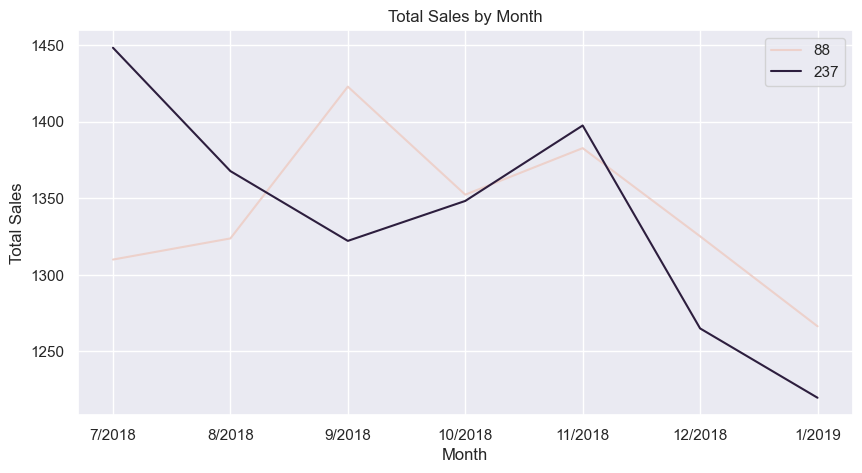

In [138]:
#plotting Total Sales comparison
#creating comparison data frame
comparison_data = data_for_plot(df_pre_trial, 88, 237)

plt.figure(figsize=(10,5))
sns.lineplot(data=comparison_data, x='MONTHYEAR', y='T_SALES', hue='STORE_NBR')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.title('Total Sales by Month')
plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5388\2945127960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.loc[:,'MONTHYEAR'] = df_plot.loc[:,'MONTH'].astype(str) + '/' + df_plot.loc[:,'YEAR'].astype(str)


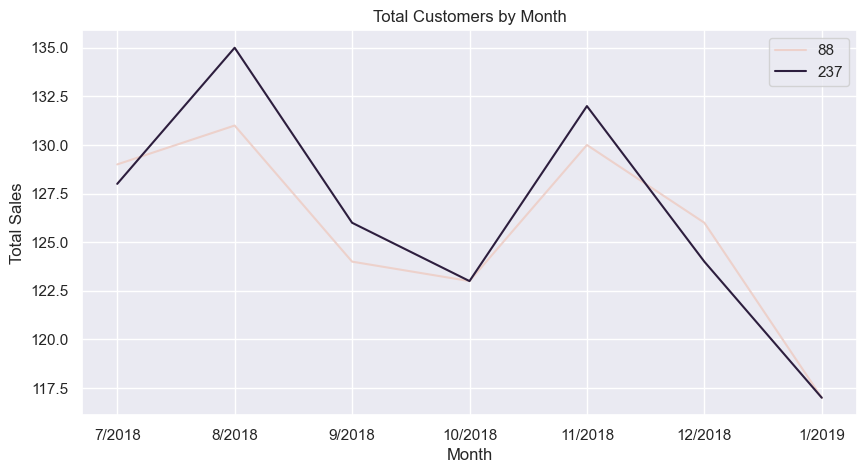

In [144]:
#plotting Total Sales comparison
#creating comparison data frame
comparison_data = data_for_plot(df_pre_trial, 88, 237)

plt.figure(figsize=(10,5))
sns.lineplot(data=comparison_data, x='MONTHYEAR', y='N_CUSTOMERS', hue='STORE_NBR')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.title('Total Customers by Month')
plt.legend()
plt.show()

##### Assesstment of Trial

In [121]:
# Scaling pre-trial control sales to match pre-trial trial stores sales
#getting scale factor from total sales between trial and control stores
t_sales_scale_factor = df_pre_trial.loc[df_pre_trial['STORE_NBR'] == 88, 'T_SALES'].sum() / df_pre_trial.loc[df_pre_trial['STORE_NBR'] == 237, 'T_SALES'].sum()
n_cust_scale_factor = df_pre_trial.loc[df_pre_trial['STORE_NBR'] == 88, 'N_CUSTOMERS'].sum() / df_pre_trial.loc[df_pre_trial['STORE_NBR'] == 237, 'N_CUSTOMERS'].sum()
print('Total sales scale factor: ', t_sales_scale_factor)
print('Number of Customers scale factor: ', n_cust_scale_factor)

Total sales scale factor:  1.001558330664959
Number of Customers scale factor:  0.9943502824858758


In [122]:
#applying scale factor to all control stores' total sales data
scaled_control_237 = df_summary_final.loc[df_summary_final['STORE_NBR'] == 237]
scaled_control_237.loc[:,'T_SALES'] = scaled_control_237.loc[:,'T_SALES'].map(lambda x: x * t_sales_scale_factor)
scaled_control_237.loc[:,'N_CUSTOMERS'] = scaled_control_237.loc[:,'N_CUSTOMERS'].map(lambda x: x * n_cust_scale_factor)
scaled_control_237 = scaled_control_237.reset_index().drop('index', axis=1)
scaled_control_237.head()

,YEAR,MONTH,STORE_NBR,T_SALES,N_CUSTOMERS,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT,MONTH_YEAR
0,2018,7,237,1450.657086,127.276836,1.265625,2.000000,4.470370,7/2018
1,2018,8,237,1369.931485,134.237288,1.222222,1.896970,4.369968,8/2018
2,2018,9,237,1324.260425,125.288136,1.182540,2.006711,4.422074,9/2018
3,2018,10,237,1350.401097,122.305085,1.195122,2.034014,4.509365,10/2018
4,2018,11,237,1399.777923,131.254237,1.219697,1.987578,4.367500,11/2018


In [123]:
#getting percent diff between trial and control store
store_88 = df_summary_final.loc[df_summary_final['STORE_NBR'] == 88, 'YEAR':'N_CUSTOMERS']
store_88.head()

,YEAR,MONTH,STORE_NBR,T_SALES,N_CUSTOMERS
84,2018,7,88,1310.0,129
348,2018,8,88,1323.8,131
613,2018,9,88,1423.0,124
878,2018,10,88,1352.4,123
1142,2018,11,88,1382.8,130


In [124]:
#merging trial store 88 and control store 237
scaled_control_237 = scaled_control_237.merge(store_88, on=['YEAR', 'MONTH'])
scaled_control_237.head()

,YEAR,MONTH,STORE_NBR_x,T_SALES_x,N_CUSTOMERS_x,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT,MONTH_YEAR,STORE_NBR_y,T_SALES_y,N_CUSTOMERS_y
0,2018,7,237,1450.657086,127.276836,1.265625,2.000000,4.470370,7/2018,88,1310.0,129
1,2018,8,237,1369.931485,134.237288,1.222222,1.896970,4.369968,8/2018,88,1323.8,131
2,2018,9,237,1324.260425,125.288136,1.182540,2.006711,4.422074,9/2018,88,1423.0,124
3,2018,10,237,1350.401097,122.305085,1.195122,2.034014,4.509365,10/2018,88,1352.4,123
4,2018,11,237,1399.777923,131.254237,1.219697,1.987578,4.367500,11/2018,88,1382.8,130


In [125]:
#calculating for percent difference
scaled_control_237.loc[:, 'PERCENT_DIFF'] = (scaled_control_237.loc[:,'T_SALES_x'] - scaled_control_237.loc[:,'T_SALES_y']).abs() / scaled_control_237.loc[:,'T_SALES_x']
scaled_control_237.loc[:, 'CUST_DIFF'] = (scaled_control_237.loc[:,'N_CUSTOMERS_x'] - scaled_control_237.loc[:,'N_CUSTOMERS_y']).abs() / scaled_control_237.loc[:,'N_CUSTOMERS_x']
scaled_control_237.head()

,YEAR,MONTH,STORE_NBR_x,T_SALES_x,N_CUSTOMERS_x,N_TRANSACTIONS_PER_CUST,N_CHIPS_PER_TRANS,A_PRICE_PER_UNIT,MONTH_YEAR,STORE_NBR_y,T_SALES_y,N_CUSTOMERS_y,PERCENT_DIFF,CUST_DIFF
0,2018,7,237,1450.657086,127.276836,1.265625,2.000000,4.470370,7/2018,88,1310.0,129,0.096961,0.013539
1,2018,8,237,1369.931485,134.237288,1.222222,1.896970,4.369968,8/2018,88,1323.8,131,0.033674,0.024116
2,2018,9,237,1324.260425,125.288136,1.182540,2.006711,4.422074,9/2018,88,1423.0,124,0.074562,0.010281
3,2018,10,237,1350.401097,122.305085,1.195122,2.034014,4.509365,10/2018,88,1352.4,123,0.001480,0.005682
4,2018,11,237,1399.777923,131.254237,1.219697,1.987578,4.367500,11/2018,88,1382.8,130,0.012129,0.009556


In [126]:
#computing standard deviation
stddev_preTrial = scaled_control_237.iloc[0:7, 12].std()
stddev_n_cust = scaled_control_237.iloc[0:7, 13].std()
print("Standard dev of sales diff: ", stddev_preTrial)
print("Standard dev of n cust diff: ", stddev_n_cust)

Standard dev of sales diff:  0.0334678673030788
Standard dev of n cust diff:  0.00741024435207507


In [127]:
#testing a null hypothesis
percent_diff = scaled_control_237.iloc[7:, 12].map(lambda x: (x - 0)/stddev_preTrial)
n_cust_diff = scaled_control_237.iloc[7:, 13].map(lambda x: (x - 0)/stddev_n_cust)
pd.concat([scaled_control_237.iloc[7:, 0:2], percent_diff, n_cust_diff], 
          axis=1)

,YEAR,MONTH,PERCENT_DIFF,CUST_DIFF
7,2019,2,0.781270,1.387456
8,2019,3,6.595668,17.873693
9,2019,4,5.768527,9.814423
10,2019,5,2.663672,0.285303
11,2019,6,5.151513,3.047677


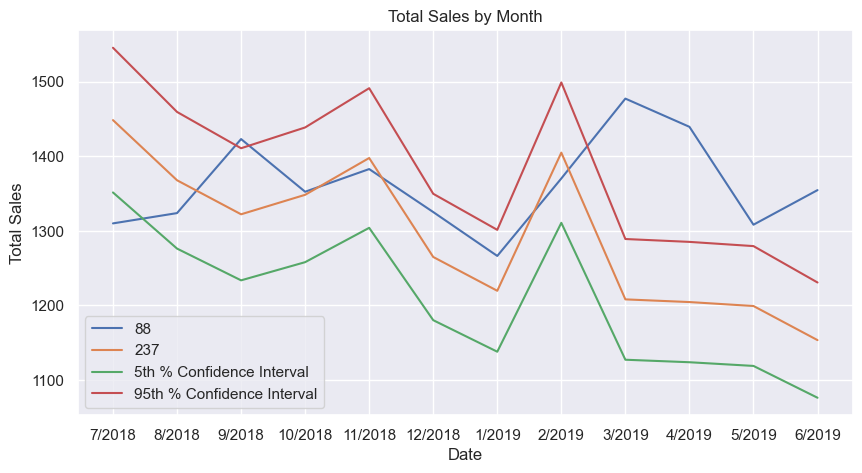

In [140]:
#plotting total sales comparison
store_88_237 = plot_comparison(df_summary_final, 88, 237)
plt.figure(figsize=(10,5))
sns.lineplot(data=store_88_237, x='MONTH_YEAR', y='T_SALES', hue='STORE_NBR')
plt.title('Total Sales by Month')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

Increase in sales during trial months for store 88

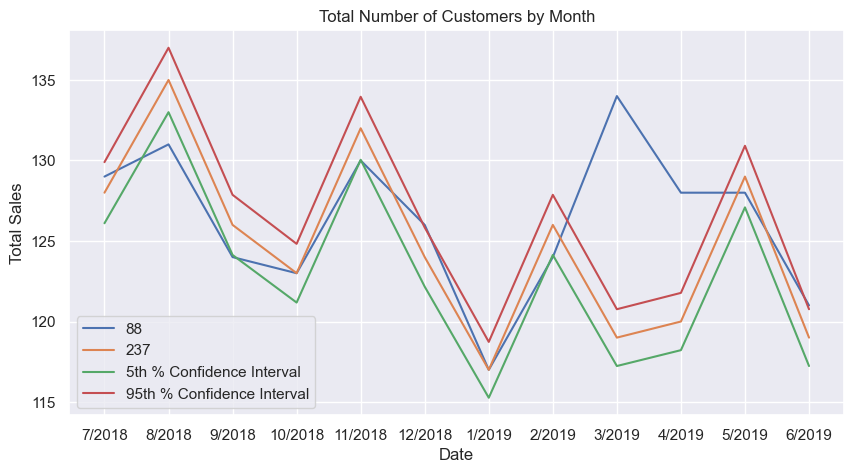

In [141]:
#plotting total sales comparison
store_88_237 = plot_comparison(df_summary_final, 88, 237)
plt.figure(figsize=(10,5))
sns.lineplot(data=store_88_237, x='MONTH_YEAR', y='N_CUSTOMERS', hue='STORE_NBR')
plt.title('Total Number of Customers by Month')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

Likewise with number of customers.

### Conclusion

On the steps done, trial stores 77, 86 and 88 was patched with control stores 233, 155 and 237 respectively.
While all the trial stores showed increased sales during the trial period months, trial store performed the best in terms of total sales and number of customers.